[View in Colaboratory](https://colab.research.google.com/github/xmpuspus/Lectures/blob/master/LinearRegression.ipynb)

# Green-Red Displacement : Linear Regression  
Linear regression is the simplest method of predicting continuous variables. Its all about establishing a relationship between dependent variable (*Y*) and one or more independent variables (*X*) using a best fit straight line (also known as regression line).

Mathematically,

$\begin {equation}
h(x_i) = y = m_i x_i + b
\end {equation}$

where $m_i$ is the linear coefficient (slope) and $b$ is the intercept.

### Why learn linear regression?

- Easy to use,
- Used everywhere,
- Runs quickly,
- interpretable,
- most basic form of machine learning.  




In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
# sns.set() # set pretty plot formatting
sns.set(rc={'figure.figsize':(20,10)})

# IMPORT MACHINE LEARNING PACKAGES
from sklearn.model_selection import train_test_split # used to split dataset
from sklearn.linear_model import LinearRegression # linear regression package

# IMPORT MACHINE LEARNING PACKAGES
from sklearn.model_selection import train_test_split # used to split dataset
from sklearn.metrics import confusion_matrix as cf # used to print out confusion matrix

### Objective:  Predict Sales Using Advertising Costs From Different Digital Platforms

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head(n = 5) # print first 5 rows of the data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Variables

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)  
- **Radio**: advertising dollars spent on Radio  
- **Newspaper**: advertising dollars spent on Newspaper  

### Target  

- **Sales**: sales of a single product in a given market (in thousands of widgets)

In [3]:
# How many rows, columns are there in the dataset?

# print the shape of the DataFrame
data.shape

(200, 4)

There are **200 observations** which means there are **200 markets** in the dataset.  

Now, let's look at sales distribution.

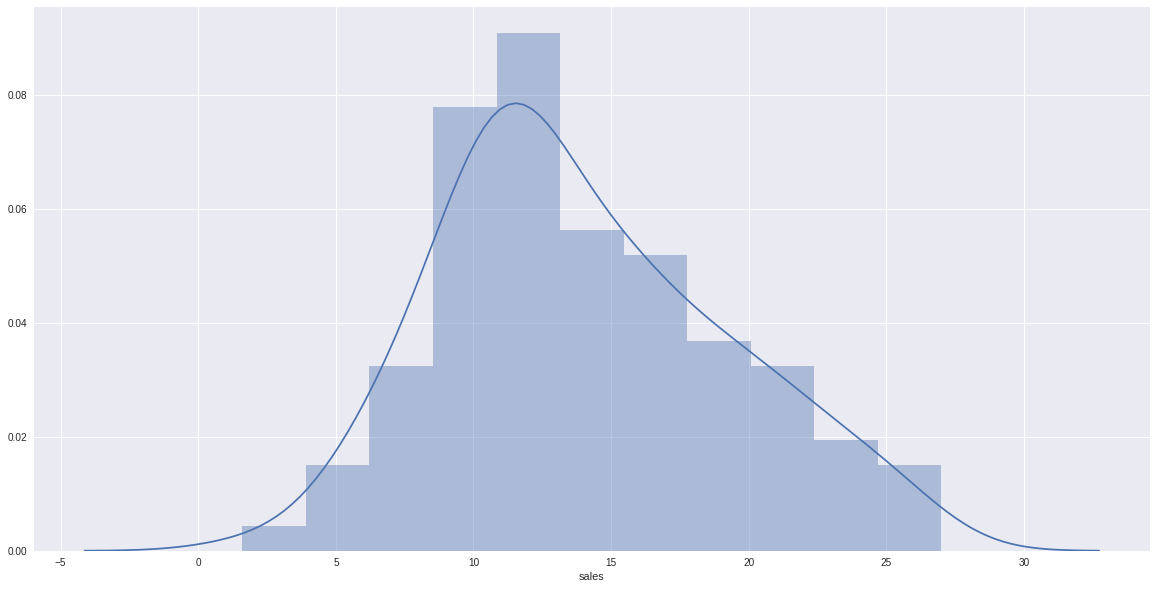

In [4]:
# Sales Distribution
sns.distplot(data['sales'])

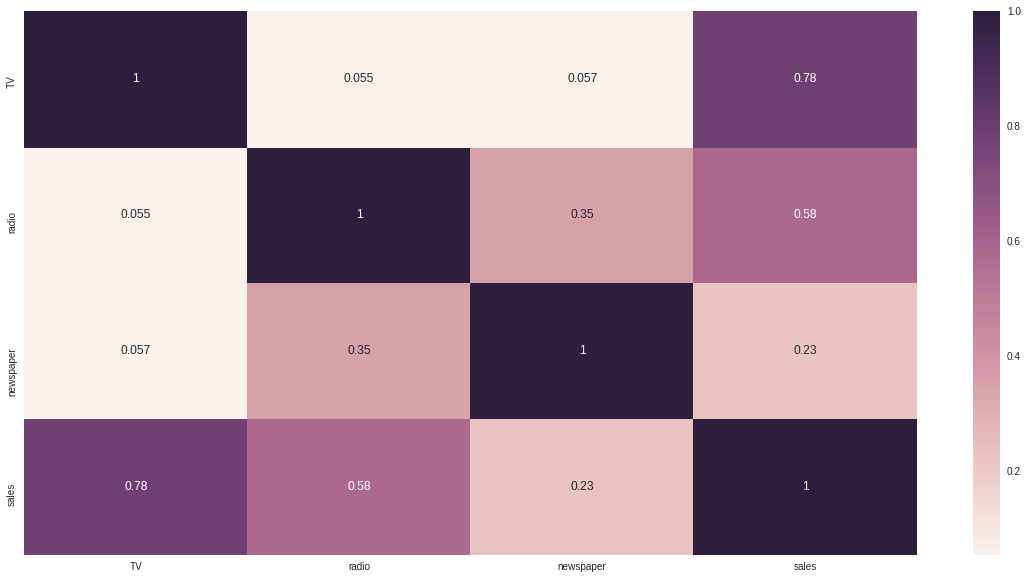

In [5]:
# Find correlation coefficients of each variable to each other.
sns.heatmap(data.corr(), annot = True)

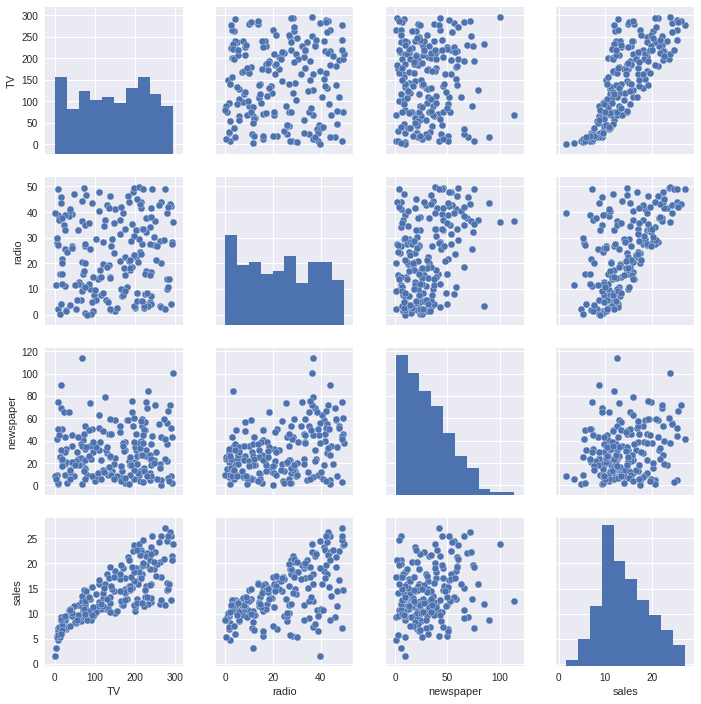

In [6]:
# Another (powerful) way of displaying correlation and distribution through scatter plots
sns.pairplot(data, size=2.5)

### Linear Regression using Sklearn

The usual methodology for fitting datasets using sklearn is:  
1. Import package, 
2. Set Variables (X) and Target (y), 
3. Initialize model,
4. Extract coefficients (and intercept),
5. Get model metric (in our case, R-squared).

In [0]:
# Set X and y
# feature_cols = ['TV', 'radio', 'newspaper']
feature_cols = ['TV'] # We use one variable first
X = data[feature_cols] # Variables used to predict target
y = data.sales # Target


In [8]:
# The usual sklearn pattern: import, instantiate, fit
lm = LinearRegression() # initialize model
lm.fit(X, y) # fit data to model

# print intercept and coefficients
print ('Intercept' , lm.intercept_)

# pair the feature names with the coefficients
pd.DataFrame((list(zip(feature_cols, lm.coef_))),
             columns = ['Features', 'Coefficients'])

Intercept 7.032593549127695


,Features,Coefficients
0,TV,0.047537


### Interpreting the Coefficients
- For a given amount of Radio and Newspaper ad spending, an **increase of 1000 dollars in TV ad spending** is associated with an **increase in Sales of 48 widgets** (assuming everything else is unchanged).



In [9]:
# calculate the R-squared
lm.score(X, y)

0.611875050850071

Results show an $R^2 = 0.612$ which isn't bad but it isn't the best either.  

### Plotting the Least Squares Line

In [10]:
# create a DataFrame with the minimum and maximum values of TV# creat 
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new

,TV
0,0.7
1,296.4


In [11]:
# use the model to make predictions on a new value
predictions = lm.predict(X_new)
predictions

array([ 7.0658692 , 21.12245377])

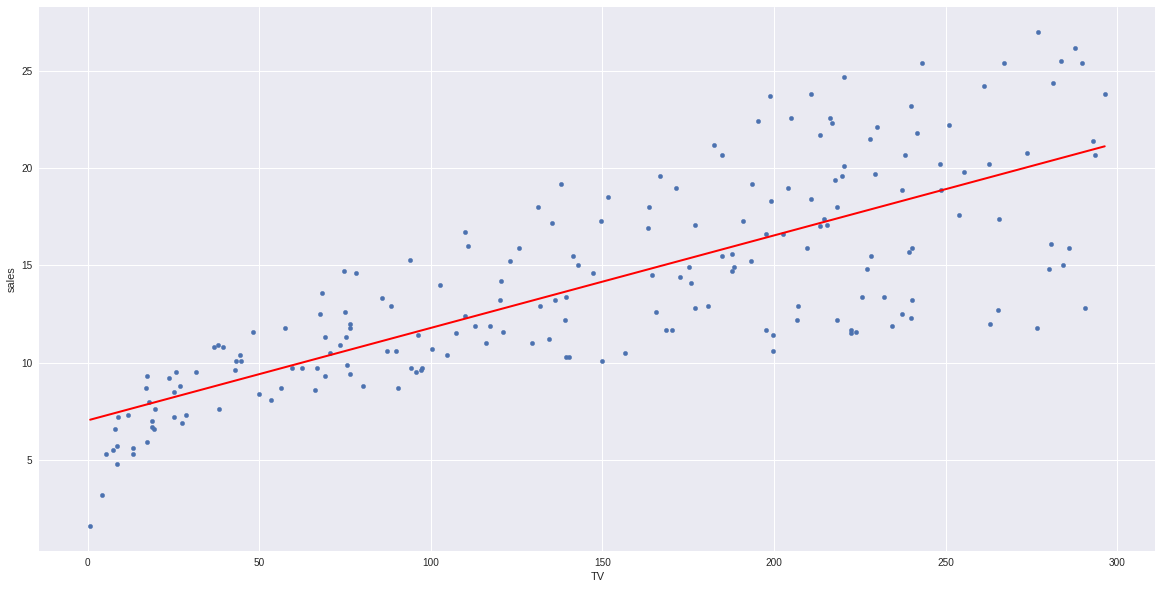

In [12]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, predictions, c='red', linewidth=2)

The equation of the red line is just: 

$\begin {equation}
Sales = 0.047537 * TV + 7.03259
\end {equation}$

### Exercise : Predict sales using one of the other 2 variables (Radio, Newspaper) using Linear Regression

Re-do the steps above and show:  

- coefficient (slope) and intercept,
- R-squared,
- Write down the equation of least-square line (best-fit line),
- Graph the best-fit line together with the data.



# Multi-linear regression

In [13]:
# create X and y
feature_cols_mult = ['TV', 'radio', 'newspaper']
X_mult = data[feature_cols_mult] # Variables used to predict target
y = data.sales # Target

# The usual sklearn pattern: import, instantiate, fit
lm_mult = LinearRegression()
lm_mult.fit(X_mult, y)

# print intercept and coefficients
print ('Intercept' , lm_mult.intercept_)

# pair the feature names with the coefficients
coefficients_mult = pd.DataFrame((list(zip(feature_cols_mult, lm_mult.coef_))),
                            columns = ['Features', 'Coefficients'])
print (coefficients_mult)

# calculate the R-squared
rsquared_mult  = lm_mult.score(X_mult, y)
print ("R-squared value is: ", rsquared_mult)


Intercept 2.938889369459412
    Features  Coefficients
0         TV      0.045765
1      radio      0.188530
2  newspaper     -0.001037
R-squared value is:  0.8972106381789521


The equation of the red line is just: 

$\begin {equation}
Sales = 0.045765 * TV + 0.188530 * Radio - 0.001037 * newspaper + 2.9388
\end {equation}$

### Interpreting the Coefficients
- For a given amount of Radio and Newspaper ad spending, an **increase of 1000 dollars in TV ad spending** is associated with an **increase in Sales of 46 widgets** (assuming everything else is unchanged).

- For a given amount of TV and Newspaper ad spending, an **increase of 1000 dollars in Radio ad spending** is associated with an **increase in Sales of 188 widgets** (assuming everything else is unchanged).
- For a given amount of TV and Radio ad spending, a **decrease of 1000 dollars in newspaper ad spending** is associated with an **increase in Sales of 1 widget**.

Results show that the $R^2 = 0.897$ which basically tells us that the model, in a way, is able predict *Sales*.  


# Classification : Logistic Regression

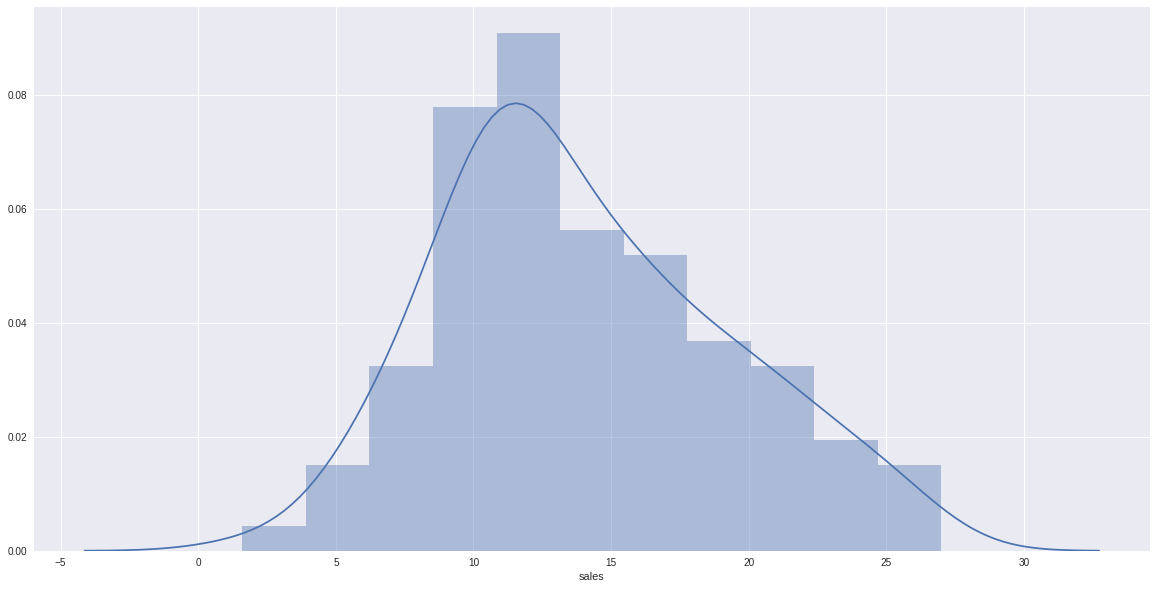

In [14]:
sns.distplot(y)

In [16]:
y.describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

In [0]:
# categorize data to high or low sales (True if High)
y_categ = y > 13.

In [19]:
y_categ.head()

1     True
2    False
3    False
4     True
5    False
Name: sales, dtype: bool

In [0]:
# !pip install tpot

In [0]:
from tpot import TPOTClassifier

In [0]:
# Split the data 75-25
X_train, X_test, y_train, y_test = train_test_split(X_mult, y_categ, train_size=0.75, test_size=0.25)

In [26]:
tpot = TPOTClassifier(generations=10, max_time_mins=5, max_eval_time_mins=0.01, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress: 105pipeline [00:23,  4.14pipeline/s]

Generation 1 - Current best internal CV score: 0.9533333333333335


Optimization Progress: 156pipeline [00:35,  4.50pipeline/s]

Generation 2 - Current best internal CV score: 0.9533333333333335


Optimization Progress: 209pipeline [00:54,  5.64pipeline/s]

Generation 3 - Current best internal CV score: 0.9666666666666668


Optimization Progress: 260pipeline [01:10,  3.56pipeline/s]

Generation 4 - Current best internal CV score: 0.9666666666666668


Optimization Progress: 310pipeline [01:29,  3.58pipeline/s]

Generation 5 - Current best internal CV score: 0.9666666666666668


Optimization Progress: 362pipeline [01:50,  2.24pipeline/s]

Generation 6 - Current best internal CV score: 0.9666666666666668


Optimization Progress: 414pipeline [02:15,  2.50pipeline/s]

Generation 7 - Current best internal CV score: 0.9666666666666668


Optimization Progress: 466pipeline [02:43,  2.33pipeline/s]

Generation 8 - Current best internal CV score: 0.9733333333333334


Optimization Progress: 518pipeline [03:11,  2.38pipeline/s]

Generation 9 - Current best internal CV score: 0.9733333333333334


Optimization Progress: 572pipeline [03:40,  2.68pipeline/s]

Generation 10 - Current best internal CV score: 0.9733333333333334


Optimization Progress: 623pipeline [04:09,  2.38pipeline/s]

Generation 11 - Current best internal CV score: 0.9733333333333334


Optimization Progress: 679pipeline [04:43,  1.75pipeline/s]

Generation 12 - Current best internal CV score: 0.9733333333333334



5.00352105 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.15000000000000002, min_samples_leaf=14, min_samples_split=7, n_estimators=100)
0.94


In [27]:
pd.DataFrame(dict(list(tpot.evaluated_individuals_.items()))).T\
.replace([np.inf, -np.inf], np.nan)\
.dropna()\
.drop('generation', axis = 1)\
.sort_values('internal_cv_score', ascending = False)\
.head()

,crossover_count,internal_cv_score,mutation_count,operator_count,predecessor
"ExtraTreesClassifier(RobustScaler(input_matrix), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.25, ExtraTreesClassifier__min_samples_leaf=14, ExtraTreesClassifier__min_samples_split=7, ExtraTreesClassifier__n_estimators=100)",0,0.973333,5,2.0,(ExtraTreesClassifier(RobustScaler(input_matri...
"ExtraTreesClassifier(RobustScaler(RobustScaler(input_matrix)), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.15000000000000002, ExtraTreesClassifier__min_samples_leaf=14, ExtraTreesClassifier__min_samples_split=10, ExtraTreesClassifier__n_estimators=100)",0,0.973333,6,3.0,(ExtraTreesClassifier(RobustScaler(input_matri...
"ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=14, ExtraTreesClassifier__min_samples_split=4, ExtraTreesClassifier__n_estimators=100)",1,0.973333,5,1.0,"(ExtraTreesClassifier(input_matrix, ExtraTrees..."
"ExtraTreesClassifier(SelectFwe(input_matrix, SelectFwe__alpha=0.034), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=8, ExtraTreesClassifier__min_samples_split=4, ExtraTreesClassifier__n_estimators=100)",0,0.973333,3,2.0,"(ExtraTreesClassifier(input_matrix, ExtraTrees..."
"ExtraTreesClassifier(RobustScaler(input_matrix), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.15000000000000002, ExtraTreesClassifier__min_samples_leaf=14, ExtraTreesClassifier__min_samples_split=7, ExtraTreesClassifier__n_estimators=100)",0,0.973333,4,2.0,"(ExtraTreesClassifier(input_matrix, ExtraTrees..."
